In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms

In [15]:
# coding=utf-8

L = [0, 10, 20, 30, 40, 50]
low, high, stride = 1, 4, 2

# 正序
assert L[:] == [0, 10, 20, 30, 40, 50] # [seq[0],   seq[1],          ..., seq[-1]    ]
assert L[low:] == [10, 20, 30, 40, 50] # [seq[low], seq[low+1],      ..., seq[-1]    ]
assert L[:high] == [0, 10, 20, 30]     # [seq[0],   seq[1],          ..., seq[high-1]]
assert L[low:high] == [10, 20, 30]     # [seq[low], seq[low+1],      ..., seq[high-1]]
assert L[::stride] == [0, 20, 40]      # [seq[0],   seq[stride],     ..., seq[-1]    ]
assert L[low::stride] == [10, 30, 50]  # [seq[low], seq[low+stride], ..., seq[-1]    ]
assert L[:high:stride] == [0, 20]      # [seq[0],   seq[stride],     ..., seq[high-1]]
assert L[low:high:stride] == [10, 30]  # [seq[low], seq[low+stride], ..., seq[high-1]]

# 逆序
assert L[::-stride] == [50, 30, 10]    # [seq[-1],   seq[-1-stride],   ..., seq[0]    ]
assert L[high::-stride] == [40, 20, 0] # [seq[high], seq[high-stride], ..., seq[0]    ]
assert L[:low:-stride] == [50, 30]     # [seq[-1],   seq[-1-stride],   ..., seq[low+1]]
assert L[high:low:-stride] == [40, 20] # [seq[high], seq[high-stride], ..., seq[low+1]]

In [3]:
# 从二级制数据读取文件
import torch.utils.data as Data
import os
import gzip
import numpy as np

dataPath = '/home/zuoyuhui/datasets/fashion-mnist'

import pickle
import requests



def load_data(data_folder, data_name, label_name):
    """
        data_folder: 文件目录
        data_name： 数据文件名
        label_name：标签数据文件名
    """
    with gzip.open(os.path.join(data_folder,label_name), 'rb') as lbpath: # rb表示的是读取二进制数据
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)
 
    with gzip.open(os.path.join(data_folder,data_name), 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    return (x_train, y_train)


class DealDataset(Data.Dataset):
    """
        读取数据、初始化数据
    """
    def __init__(self, folder, data_name, label_name,transform=None):
        (train_set, train_labels) = load_data(folder, data_name, label_name) # 其实也可以直接使用torch.load(),读取之后的结果为torch.Tensor形式
        self.train_set = train_set
        self.train_labels = train_labels
        self.transform = transform
 
    def __getitem__(self, index):
 
        img, target = self.train_set[index], int(self.train_labels[index])
        if self.transform is not None:
            img = self.transform(img)
        return img, target
 
    def __len__(self):
        return len(self.train_set)

In [19]:
x_train,y_train = load_data(dataPath,
                           "train-images-idx3-ubyte.gz",
                           "train-labels-idx1-ubyte.gz")
 
import numpy as np
x_train = np.array(x_train)
x_valid = x_train[-10000:]
x_train = x_train[:50000]
y_train = np.array(y_train)
y_valid = y_train[-10000:]
y_train = y_train[:50000]

x_valid.shape

(10000, 28, 28)

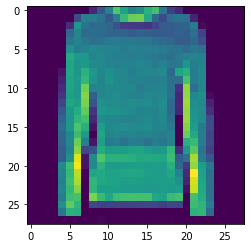

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_valid[1])

In [36]:
x_train,y_train,x_valid,y_valid = map(
    torch.tensor,(x_train,y_train,x_valid,y_valid)
)

n,c,_=x_train.cpu().data.numpy().shape
c = c**2

print(y_train.min())
x_train.size()

tensor(0, dtype=torch.uint8)


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


torch.Size([50000, 28, 28])

## 如果模型有可学习的参数最好用nn.Module  其他情况用torch.nn.functional相对简单 

- 创建一样高类必须继承nn.Module且在其构造函数中需调用nn.Module的构造函数
- 无需写方向传播，nn.Module能利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器

In [39]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights)

In [57]:
batch_size = 64
xb = x_train[0:batch_size]
yb = y_train[0:batch_size]

weights = torch.randn([28,28,10],dtype=torch.float, requires_grad = True)
bias = torch.zeros(10,requires_grad=True)



res = torch.einsum('bww,wwj->bwj', xb, weights)

tensor([[[0., 0., 0.,  ..., -0., -0., 0.],
         [0., 0., -0.,  ..., -0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., 0.],
         ...,
         [-0., -0., -0.,  ..., 0., -0., 0.],
         [-0., -0., -0.,  ..., -0., 0., -0.],
         [0., -0., -0.,  ..., -0., 0., 0.]],

        [[0., 0., 0.,  ..., -0., -0., 0.],
         [0., 0., -0.,  ..., -0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., 0.],
         ...,
         [-0., -0., -0.,  ..., 0., -0., 0.],
         [-0., -0., -0.,  ..., -0., 0., -0.],
         [0., -0., -0.,  ..., -0., 0., 0.]],

        [[0., 0., 0.,  ..., -0., -0., 0.],
         [0., 0., -0.,  ..., -0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., 0.],
         ...,
         [-0., -0., -0.,  ..., 0., -0., 0.],
         [-0., -0., -0.,  ..., -0., 0., -0.],
         [0., -0., -0.,  ..., -0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., -0., -0., 0.],
         [0., 0., -0.,  ..., -0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., 0.],
         ...,
   

In [46]:
xb.shape,weights.shape

(torch.Size([64, 28, 28]), torch.Size([28, 28, 10]))

In [49]:
xb.permute(2, 0, 1).float().size()

torch.Size([28, 64, 28])